In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the data

In [2]:
df = pd.read_csv("shopping_dataset_with_labels.csv")

# replacing whitespaces
df['Predicted_Category'] = df['Predicted_Category'].str.replace(' ', '') 
df['Predicted_Category'] = df['Predicted_Category'].str.replace('&', 'and')
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Predicted_Category,cluster
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,2,122.77,...,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,1,81.50,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0


# Removal of product categories

Since the majority of the customers bought Tees, Home \& Kitchen, and Office supplies, it may be best to remove these product categories since they may introduce noise to our clusters.

In [3]:
df_features = df[~df['Predicted_Category'].isin([
                                        # Very few bought
                                        'GiftCards' 
                                        # A lot customers bought
                                        ,'homeandkitchen'
                                        ,'Tees'
                                        ,'office'
        ])]
df_features.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Predicted_Category,cluster
2172,17850,M,Chicago,12,16704,2019-01-01,GGOEGAPB058615,Google Women's Yoga Jacket Black,1,108.31,...,Used,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,sportsandfitness,7.0
2174,17850,M,Chicago,12,16715,2019-01-01,GGOEYAFB073115,YouTube Men's Fleece Hoodie Black,1,57.76,...,Used,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,7.0
2179,12583,M,Chicago,33,16693,2019-01-01,GGOEGATB060415,Google Women's Quilted Insulated Vest Black,1,61.89,...,Clicked,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0
2185,12583,M,Chicago,33,16695,2019-01-01,GGOEGAFJ036214,Google Men's Pullover Hoodie Grey,1,42.91,...,Clicked,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0
2186,12583,M,Chicago,33,16695,2019-01-01,GGOEGAYC068324,Google Youth Short Sleeve T-shirt Royal Blue,1,15.67,...,Clicked,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,KidsApparel,1.0


In [4]:
def purchase_multiplier(row):
    qty = row['Quantity']
    cat = row['Predicted_Category']

    total = [cat] * qty

    return ' '.join(total)

df_features["Purchases"] = df_features.apply(purchase_multiplier, axis=1)
df_features.head()

/tmp/ipykernel_69886/1733026480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["Purchases"] = df_features.apply(purchase_multiplier, axis=1)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Predicted_Category,cluster,Purchases
2172,17850,M,Chicago,12,16704,2019-01-01,GGOEGAPB058615,Google Women's Yoga Jacket Black,1,108.31,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,sportsandfitness,7.0,sportsandfitness
2174,17850,M,Chicago,12,16715,2019-01-01,GGOEYAFB073115,YouTube Men's Fleece Hoodie Black,1,57.76,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,7.0,HoodiesandJackets
2179,12583,M,Chicago,33,16693,2019-01-01,GGOEGATB060415,Google Women's Quilted Insulated Vest Black,1,61.89,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0,HoodiesandJackets
2185,12583,M,Chicago,33,16695,2019-01-01,GGOEGAFJ036214,Google Men's Pullover Hoodie Grey,1,42.91,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0,HoodiesandJackets
2186,12583,M,Chicago,33,16695,2019-01-01,GGOEGAYC068324,Google Youth Short Sleeve T-shirt Royal Blue,1,15.67,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,KidsApparel,1.0,KidsApparel


# Combining the categories bought by the customer

Preprocessing step before TF-IDF vectorization. In this case:

* Document = Customer and their purchase history
* Corpus = Collection of customers and their corresponding purchase history.

In [5]:
df_combined_categories = (
                            df_features
                            .groupby('CustomerID')
                            ['Purchases']
                            .apply(lambda x: ' '.join(x))
                            .reset_index()
)
df_combined_categories.head()

,CustomerID,Purchases
0,12347,KidsApparel HoodiesandJackets bagsandluggage b...
1,12348,KidsApparel KidsApparel sportsandfitness Drink...
2,12350,CapsandHats CapsandHats CapsandHats CapsandHat...
3,12356,sportsandfitness KidsApparel KidsApparel KidsA...
4,12359,CapsandHats


# TF-IDF vectorization of the product category

We treat the TF-IDF score as the ``customer's interest of a product category``. The advantage of using TF-IDF is that it assigns higher weights to products that are frequently bought by a customer but rarely bought in the entire dataset. We are hoping to get clusters that buy from rarely bought product categories.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined_categories['Purchases'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray()
                        ,columns=tfidf_vectorizer.get_feature_names_out()
                        ,index=df_combined_categories['CustomerID'])
tfidf_df.head()

,bagsandluggage,beautyandhealth,capsandhats,carandmotorbike,drinkware,hoodiesandjackets,kidsapparel,onesie,petsupplies,sportsandfitness
CustomerID,,,,,,,,,,
12347,0.649687,0.000000,0.190407,0.0,0.683360,0.179499,0.105328,0.0,0.0,0.177079
12348,0.000000,0.000000,0.000000,0.0,0.729847,0.000000,0.026643,0.0,0.0,0.683091
12350,0.000000,0.000000,0.955157,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.296100
12356,0.139746,0.299875,0.000000,0.0,0.342975,0.270269,0.792956,0.0,0.0,0.266626
12359,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


# We standardize the TF-IDF scores

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data simultaneously
X = scaler.fit_transform(tfidf_df.to_numpy())

# Clustering

In this step, we train various K-Means clustering models with various values of $K$ (the number of clusters) in order to get the optimal number of clusters that best separates the customers.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Store the evaluation scores
inertia = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(4, 20)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 15 times to get the average evaluation scores later on
    for _ in range(15):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmeans = KMeans(n_clusters=k, 
                        init='k-means++', 
                        algorithm='elkan',
                        n_init=10)
        kmeans.fit(X)

        # Getting the cluster labels
        labels = kmeans.labels_

        # Get the Inertia (for elbow method)
        inertia_samples.append(kmeans.inertia_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 10
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 11
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 12
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8


Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

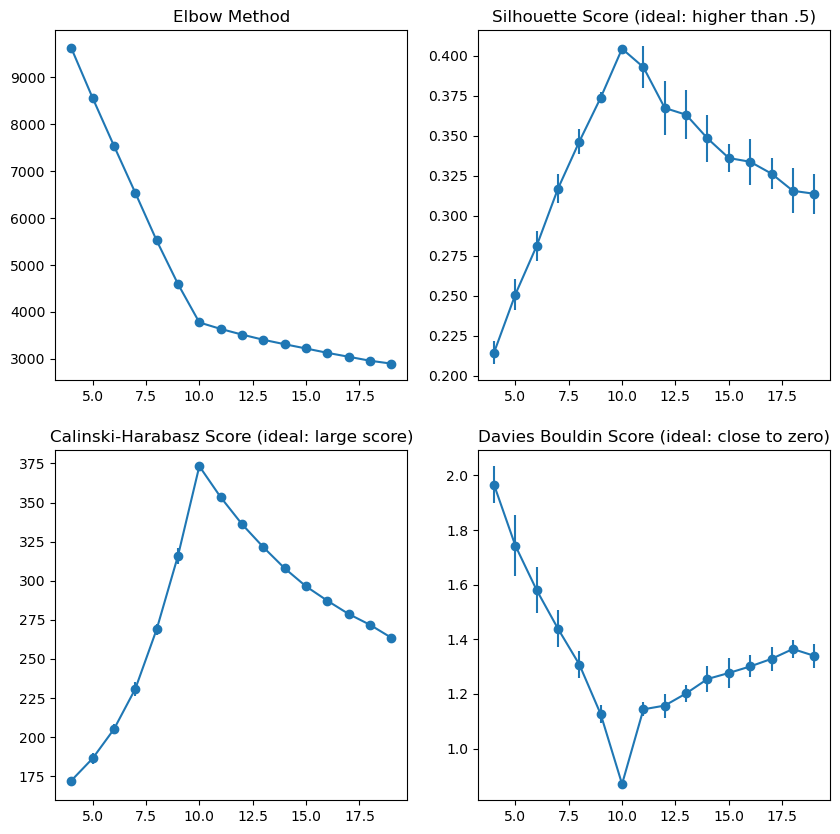

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

### We focus only on the Elbow method. Treat the other metrics as support/confirmation.

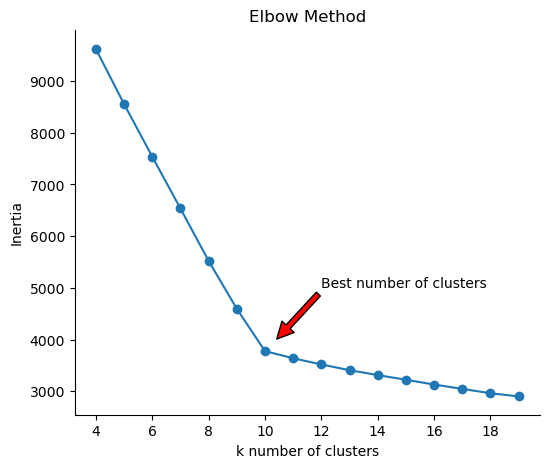

In [59]:
# Elbow method only
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
ax.errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')

# Annotation
ax.annotate('Best number of clusters', xy=(10.4, 4000), xytext=(12, 5000),
            arrowprops=dict(facecolor='red', shrink=0.01))

ax.set_title('Elbow Method')
ax.set_xlabel("k number of clusters")
ax.set_ylabel("Inertia")
ax.spines[['right', 'top']].set_visible(False);

In K-means clustering, an elbow means we have found the optimal number of clusters (k=10 in our case).

### Final K-Means model. We choose K=10

In [10]:
kmeans = KMeans(n_clusters=10, 
                init='k-means++', 
                algorithm='elkan',
                n_init=10)
kmeans.fit(X)
tfidf_df['cluster'] = kmeans.labels_
tfidf_df.head()

,bagsandluggage,beautyandhealth,capsandhats,carandmotorbike,drinkware,hoodiesandjackets,kidsapparel,onesie,petsupplies,sportsandfitness,cluster
CustomerID,,,,,,,,,,,
12347,0.649687,0.000000,0.190407,0.0,0.683360,0.179499,0.105328,0.0,0.0,0.177079,9
12348,0.000000,0.000000,0.000000,0.0,0.729847,0.000000,0.026643,0.0,0.0,0.683091,0
12350,0.000000,0.000000,0.955157,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.296100,4
12356,0.139746,0.299875,0.000000,0.0,0.342975,0.270269,0.792956,0.0,0.0,0.266626,5
12359,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4


# Interests

In [11]:
df_counts = pd.pivot_table(df[['CustomerID', 'Predicted_Category']]
                           ,index='CustomerID'
                           ,columns = 'Predicted_Category'
                           ,aggfunc='size'
                           ,fill_value=0)

for col in df_counts.columns:
    df_counts[col] = np.where(df_counts[col] > 0, 1, 0)

df_counts = pd.merge(df_counts, tfidf_df[['cluster']], how='left', left_index=True, right_index=True)
df_counts.head()

,CapsandHats,Drinkware,GiftCards,HoodiesandJackets,KidsApparel,Tees,bagsandluggage,beautyandhealth,carandmotorbike,homeandkitchen,office,onesie,petsupplies,sportsandfitness,cluster
CustomerID,,,,,,,,,,,,,,,
12346,0,0,0,0,0,1,0,0,0,0,1,0,0,0,NaN
12347,1,1,0,1,1,1,1,0,0,1,1,0,0,1,9.0
12348,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0.0
12350,1,0,0,0,0,1,0,0,0,1,0,0,0,1,4.0
12356,0,1,0,1,1,1,1,1,0,1,1,0,0,1,5.0


### Number of customers per cluster

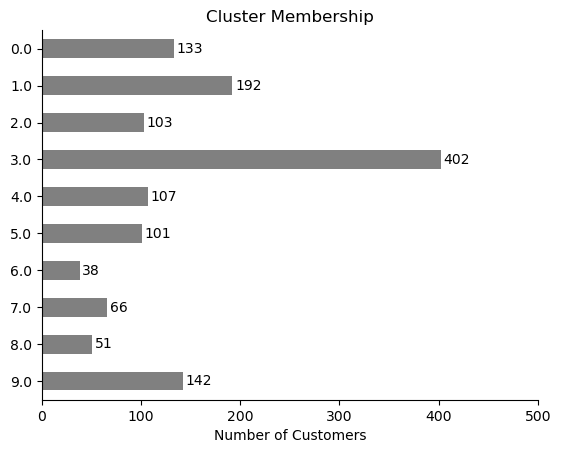

In [24]:
ax = df_counts["cluster"].value_counts().sort_index(ascending=False).plot(kind="barh", color="grey", title='Cluster Membership')
ax.bar_label(ax.containers[0], padding=2)
ax.set_xlim(0, 500)
ax.set_xlabel("Number of Customers")
ax.set_ylabel("")
ax.spines[['right', 'top']].set_visible(False);

In [18]:
df_counts["cluster"].value_counts().sort_index()

cluster
0.0    133
1.0    192
2.0    103
3.0    402
4.0    107
5.0    101
6.0     38
7.0     66
8.0     51
9.0    142
Name: count, dtype: int64

# Interests per cluster

In [14]:
interest_df = df_counts.groupby('cluster').mean().round(2)
interest_df

,CapsandHats,Drinkware,GiftCards,HoodiesandJackets,KidsApparel,Tees,bagsandluggage,beautyandhealth,carandmotorbike,homeandkitchen,office,onesie,petsupplies,sportsandfitness
cluster,,,,,,,,,,,,,,
0.0,0.40,0.60,0.05,0.42,0.35,0.92,0.44,0.39,0.14,0.89,0.85,0.13,0.16,1.00
1.0,0.42,0.59,0.07,0.44,0.29,0.88,0.44,1.00,0.13,0.94,0.76,0.08,0.11,0.45
2.0,0.39,0.54,0.04,1.00,0.25,0.88,0.31,0.33,0.10,0.81,0.66,0.10,0.13,0.50
3.0,0.50,1.00,0.06,0.61,0.46,0.92,0.58,0.41,0.21,0.91,0.89,0.22,0.25,0.60
4.0,1.00,0.49,0.06,0.45,0.23,0.89,0.35,0.40,0.10,0.88,0.76,0.07,0.09,0.41
5.0,0.43,0.48,0.01,0.50,1.00,0.83,0.36,0.21,0.09,0.83,0.71,0.14,0.18,0.43
6.0,0.39,0.42,0.03,0.37,0.55,0.84,0.29,0.11,0.03,0.84,0.63,1.00,0.13,0.34
7.0,0.47,0.74,0.08,0.61,0.44,0.88,0.56,0.48,0.15,0.91,0.88,0.21,1.00,0.59
8.0,0.51,0.45,0.04,0.43,0.33,0.90,0.43,0.37,1.00,0.94,0.75,0.18,0.12,0.41


In cluster 0, 40% of the customers bought caps and hats, 60% bought drinkware, etc. We apply a threshold of 70% for determining a cluster's interest(s).

In [15]:
# Save to CSV
interest_df.to_csv("customer_segmentation.csv")